In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras_tuner
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'keras_tuner'

In [328]:
leakage_dataset_train_100 = pd.read_csv(r"Leakage Detection\leakage_dataset_train_100.csv")
#leakage_dataset_train_1000 = pd.read_csv(r"Leakage Detection\leakage_dataset_train_1000.csv")
leakage_dataset_validation_1000 = pd.read_csv(r"Leakage Detection\leakage_dataset_validation_1000.csv")

In [329]:
X_train = leakage_dataset_train_100[['mfc1', 'mfc2', 'mfc3', 'mfc4']].to_numpy()
Y_train = leakage_dataset_train_100[['y1', 'y2']].to_numpy()

In [330]:
X_validation = leakage_dataset_validation_1000[['mfc1', 'mfc2', 'mfc3', 'mfc4']].to_numpy()
Y_validation = leakage_dataset_validation_1000[['y1', 'y2']].to_numpy()

In [331]:
lst = []
for i in X_train:
    sum = 0
    for j in i:
        sum += j
    lst.append(sum)
lst

[0.9999999999999998,
 0.9999999999999999,
 1.0,
 1.0,
 1.0,
 0.9999999999999998,
 1.0,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999999,
 1.0000000000000002,
 0.9999999999999998,
 1.0,
 0.9999999999999999,
 0.9999999999999998,
 0.9999999999999999,
 0.9999999999999999,
 0.9999999999999999,
 0.9999999999999998,
 1.0,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999997,
 0.9999999999999998,
 1.0,
 0.9999999999999999,
 0.9999999999999997,
 0.9999999999999998,
 0.9999999999999997,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999999,
 0.9999999999999999,
 0.9999999999999998,
 1.0,
 0.9999999999999999,
 0.9999999999999997,
 1.0,
 1.0,
 1.0,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999999,
 1.0,
 1.0,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999999,
 0.9999999999999998,
 0.9999999999999998,
 1.0,
 1.0,
 0.9999999999999999,
 0.9999999999999998,
 1.0,
 1.0,
 1.0,
 0.9999999999999999,
 0.9999999999999998,
 0.9999999

In [326]:
X_train

array([[0.41525552, 0.17361751, 0.1497378 , 0.26138918],
       [0.0916956 , 0.0595173 , 0.09472504, 0.75406206],
       [0.15292732, 0.32832613, 0.33597277, 0.18277378],
       [0.16139818, 0.1255142 , 0.18272491, 0.53036271],
       [0.38068837, 0.16016258, 0.16803731, 0.29111174],
       [0.28750866, 0.17637608, 0.15881871, 0.37729655],
       [0.16128977, 0.32639877, 0.30481001, 0.20750145],
       [0.11926427, 0.59904058, 0.12901478, 0.15268037],
       [0.12654071, 0.11934361, 0.13004062, 0.62407506],
       [0.24899306, 0.23970226, 0.24242152, 0.26888316],
       [0.38467507, 0.24215416, 0.15726729, 0.21590349],
       [0.25151598, 0.40482328, 0.14302099, 0.20063975],
       [0.33277904, 0.23091118, 0.16404027, 0.27226951],
       [0.13578954, 0.0951865 , 0.14137161, 0.62765235],
       [0.3390113 , 0.27055232, 0.1695353 , 0.22090108],
       [0.11633247, 0.60770901, 0.13988595, 0.13607257],
       [0.36088794, 0.21496865, 0.18302105, 0.24112237],
       [0.23514686, 0.33279143,

In [280]:
leakage_dataset_train_100.isnull().sum()

y1      0
y2      0
mfc1    0
mfc2    0
mfc3    0
mfc4    0
dtype: int64

Text(0.5, 0, 'Data')

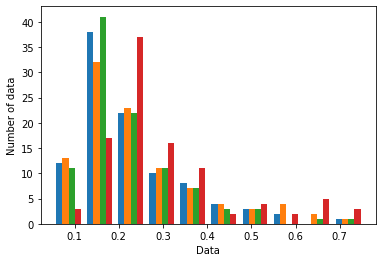

In [307]:
plt.hist(X_train)
plt.ylabel('Number of data')
plt.xlabel('Data')

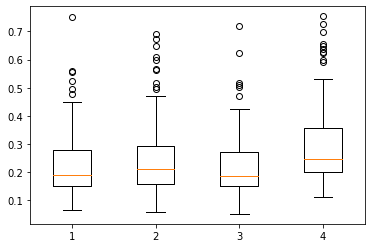

In [308]:
%matplotlib inline
B = plt.boxplot(X_train)
plt.show()

In [298]:
lst = []
for i in X_train[:,:-1]:
    sum = 0
    for j in i:
        sum += j
    lst.append(sum)
X_train[:,-1] = np.ones(100) - lst

In [309]:
list_whisker = [item.get_ydata() for item in B['whiskers']]
list_whisker

[array([0.15104118, 0.06433784]),
 array([0.27953555, 0.4504011 ]),
 array([0.15927049, 0.0595173 ]),
 array([0.2926093 , 0.46881146]),
 array([0.15077288, 0.05122426]),
 array([0.27253617, 0.42546578]),
 array([0.20039553, 0.11240221]),
 array([0.35654869, 0.53036271])]

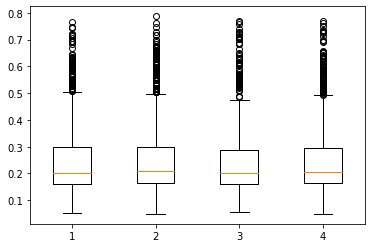

In [310]:
%matplotlib inline
B1 = plt.boxplot(X_validation)
plt.show()

In [312]:
list_whisker_val = [item.get_ydata() for item in B1['whiskers']]
list_whisker_val

[array([0.16234618, 0.05349716]),
 array([0.2993559 , 0.50403049]),
 array([0.16344416, 0.04891348]),
 array([0.29840857, 0.49760057]),
 array([0.16077478, 0.05659426]),
 array([0.28779415, 0.47630593]),
 array([0.16270096, 0.04941728]),
 array([0.29547214, 0.49441948])]

In [269]:
count = 0
lower_whisker = 0
upper_whisker = 0
for i in list_whisker[:-2]:
    if count%2 == 0:
        lower_whisker = lower_whisker + i[1]
    if count%2 != 0:
        upper_whisker += i[1]
    count += 1
    
lower_whisker = lower_whisker/3
upper_whisker = upper_whisker/3

print(lower_whisker)
print(upper_whisker)

0.058359800593139534
0.44822611241540056


In [270]:
diff_lower_whisker = list_whisker[-2][1] - lower_whisker
diff_lower_whisker = float("{:10.9f}".format(diff_lower_whisker))
diff_upper_whisker = list_whisker[-1][1] - upper_whisker
diff_upper_whisker = float("{:10.9f}".format(diff_upper_whisker))
print(diff_lower_whisker)
print(diff_upper_whisker)

0.05404241
0.082136597


In [271]:
X_train[:,-1] = X_train[:,-1] - diff_lower_whisker
X_train

array([[0.41525552, 0.17361751, 0.1497378 , 0.20734677],
       [0.0916956 , 0.0595173 , 0.09472504, 0.70001965],
       [0.15292732, 0.32832613, 0.33597277, 0.12873137],
       [0.16139818, 0.1255142 , 0.18272491, 0.4763203 ],
       [0.38068837, 0.16016258, 0.16803731, 0.23706933],
       [0.28750866, 0.17637608, 0.15881871, 0.32325414],
       [0.16128977, 0.32639877, 0.30481001, 0.15345904],
       [0.11926427, 0.59904058, 0.12901478, 0.09863796],
       [0.12654071, 0.11934361, 0.13004062, 0.57003265],
       [0.24899306, 0.23970226, 0.24242152, 0.21484075],
       [0.38467507, 0.24215416, 0.15726729, 0.16186108],
       [0.25151598, 0.40482328, 0.14302099, 0.14659734],
       [0.33277904, 0.23091118, 0.16404027, 0.2182271 ],
       [0.13578954, 0.0951865 , 0.14137161, 0.57360994],
       [0.3390113 , 0.27055232, 0.1695353 , 0.16685867],
       [0.11633247, 0.60770901, 0.13988595, 0.08203016],
       [0.36088794, 0.21496865, 0.18302105, 0.18707996],
       [0.23514686, 0.33279143,

In [321]:
lst = []
for i in X_train:
    sum = 0
    for j in i:
        sum += j
    lst.append(sum)
lst

[0.9999999999999998,
 0.9999999999999999,
 1.0,
 1.0,
 1.0,
 0.9999999999999998,
 1.0,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999999,
 1.0000000000000002,
 0.9999999999999998,
 1.0,
 0.9999999999999999,
 0.9999999999999998,
 0.9999999999999999,
 0.9999999999999999,
 0.9999999999999999,
 0.9999999999999998,
 1.0,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999997,
 0.9999999999999998,
 1.0,
 0.9999999999999999,
 0.9999999999999997,
 0.9999999999999998,
 0.9999999999999997,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999999,
 0.9999999999999999,
 0.9999999999999998,
 1.0,
 0.9999999999999999,
 0.9999999999999997,
 1.0,
 1.0,
 1.0,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999999,
 1.0,
 1.0,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999999,
 0.9999999999999998,
 0.9999999999999998,
 1.0,
 1.0,
 0.9999999999999999,
 0.9999999999999998,
 1.0,
 1.0,
 1.0,
 0.9999999999999999,
 0.9999999999999998,
 0.9999999

In [314]:
X_train

array([[0.41525552, 0.17361751, 0.1497378 , 0.25      ],
       [0.0916956 , 0.0595173 , 0.09472504, 0.25      ],
       [0.15292732, 0.32832613, 0.33597277, 0.25      ],
       [0.16139818, 0.1255142 , 0.18272491, 0.25      ],
       [0.38068837, 0.16016258, 0.16803731, 0.25      ],
       [0.28750866, 0.17637608, 0.15881871, 0.25      ],
       [0.16128977, 0.32639877, 0.30481001, 0.25      ],
       [0.11926427, 0.59904058, 0.12901478, 0.25      ],
       [0.12654071, 0.11934361, 0.13004062, 0.25      ],
       [0.24899306, 0.23970226, 0.24242152, 0.25      ],
       [0.38467507, 0.24215416, 0.15726729, 0.25      ],
       [0.25151598, 0.40482328, 0.14302099, 0.25      ],
       [0.33277904, 0.23091118, 0.16404027, 0.25      ],
       [0.13578954, 0.0951865 , 0.14137161, 0.25      ],
       [0.3390113 , 0.27055232, 0.1695353 , 0.25      ],
       [0.11633247, 0.60770901, 0.13988595, 0.25      ],
       [0.36088794, 0.21496865, 0.18302105, 0.25      ],
       [0.23514686, 0.33279143,

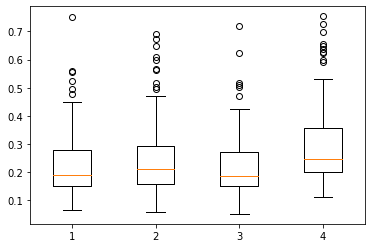

In [300]:
%matplotlib inline
B = plt.boxplot(X_train)
plt.show()

array([[0.41525552, 0.17361751, 0.1497378 , 0.20734677],
       [0.0916956 , 0.0595173 , 0.09472504, 0.70001965],
       [0.15292732, 0.32832613, 0.33597277, 0.12873137],
       [0.16139818, 0.1255142 , 0.18272491, 0.4763203 ],
       [0.38068837, 0.16016258, 0.16803731, 0.23706933],
       [0.28750866, 0.17637608, 0.15881871, 0.32325414],
       [0.16128977, 0.32639877, 0.30481001, 0.15345904],
       [0.11926427, 0.59904058, 0.12901478, 0.09863796],
       [0.12654071, 0.11934361, 0.13004062, 0.57003265],
       [0.24899306, 0.23970226, 0.24242152, 0.21484075],
       [0.38467507, 0.24215416, 0.15726729, 0.16186108],
       [0.25151598, 0.40482328, 0.14302099, 0.14659734],
       [0.33277904, 0.23091118, 0.16404027, 0.2182271 ],
       [0.13578954, 0.0951865 , 0.14137161, 0.57360994],
       [0.3390113 , 0.27055232, 0.1695353 , 0.16685867],
       [0.11633247, 0.60770901, 0.13988595, 0.08203016],
       [0.36088794, 0.21496865, 0.18302105, 0.18707996],
       [0.23514686, 0.33279143,

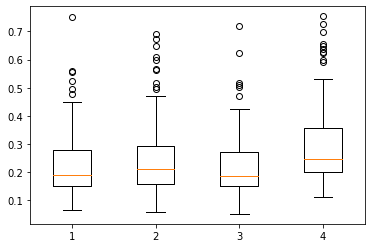

In [232]:
%matplotlib inline
B = plt.boxplot(X_train)
plt.show()

Text(0.5, 0, 'Data')

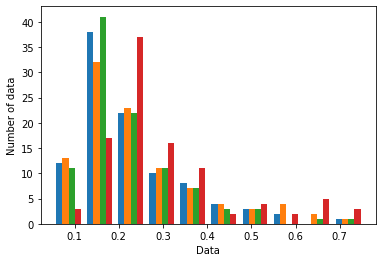

In [233]:
plt.hist(X_train)
plt.ylabel('Number of data')
plt.xlabel('Data')

In [234]:
l0 = tf.keras.layers.Dense(units = 4, input_shape = [4])
l1 = tf.keras.layers.Dense(units = 64)
l2 = tf.keras.layers.Dense(units = 128)
l3 = tf.keras.layers.Dense(units = 2)
model = tf.keras.Sequential([l0,l1,l2,l3])

In [235]:
X_train.shape

(100, 4)

In [236]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 20        
                                                                 
 dense_13 (Dense)            (None, 64)                320       
                                                                 
 dense_14 (Dense)            (None, 128)               8320      
                                                                 
 dense_15 (Dense)            (None, 2)                 258       
                                                                 
Total params: 8,918
Trainable params: 8,918
Non-trainable params: 0
_________________________________________________________________


In [237]:
model.compile(
    loss='mean_squared_error',
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

In [248]:
history = model.fit(X_train, Y_train, epochs=500, verbose=False, validation_data=(X_validation, Y_validation))

In [247]:
print(history.history['accuracy'][-1])

0.9100000262260437


In [242]:
print(model.predict(np.array([0.365104949,0.187123712,0.174337773,0.273433566]).reshape(1,4)))

1/1 [==============================] - 0s 31ms/step
[[-0.40172797  0.25839782]]


In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import keras_tuner as kt


In [3]:
(img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


In [4]:
# Normalize pixel values between 0 and 1
img_train = img_train.astype('float32') / 255.0
img_test = img_test.astype('float32') / 255.0

In [11]:
img_train.shape

(60000, 28, 28)

<IPython.core.display.Javascript object>

In [6]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [7]:
def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int("units", min_value=32, max_value=512, step=32)
    model.add(keras.layers.Dense(units=hp_units, activation="relu"))
    model.add(keras.layers.Dense(10))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )

    return model

<IPython.core.display.Javascript object>

In [8]:
tuner = kt.Hyperband(
    model_builder,
    objective="val_accuracy",
    max_epochs=10,
    factor=3,
    directory="my_dir",
    project_name="intro_to_kt",
)

<IPython.core.display.Javascript object>

In [9]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)


<IPython.core.display.Javascript object>

In [12]:
tuner.search(
    img_train, label_train, epochs=50, validation_split=0.2, callbacks=[stop_early]
)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(
    f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
"""
)

Trial 22 Complete [00h 00m 14s]
val_accuracy: 0.8575000166893005

Best val_accuracy So Far: 0.8921666741371155
Total elapsed time: 00h 04m 07s

Search: Running Trial #23

Value             |Best Value So Far |Hyperparameter
480               |416               |units
0.01              |0.001             |learning_rate
4                 |10                |tuner/epochs
0                 |4                 |tuner/initial_epoch
1                 |2                 |tuner/bracket
0                 |2                 |tuner/round

Epoch 1/4
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5714 - accuracy: 0.8059 - val_loss: 0.4382 - val_accuracy: 0.8454
Epoch 2/4
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4470 - accuracy: 0.8404 - val_loss: 0.4468 - val_accuracy: 0.8474
Epoch 3/4
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4111 - accuracy: 0.8539 - val_loss: 0.4500 - val_accuracy: 0.8482
Epoch 4/4
1490/1500 [==================

KeyboardInterrupt: 

<IPython.core.display.Javascript object>